<ipython-input-19-0da011979892>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('movies.dat', sep='::',names=["index","nom","tipus"])


index     int64
nom      object
tipus    object
dtype: object
index     int64
nom      object
tipus    object
dtype: object


C:\Users\mcarm\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


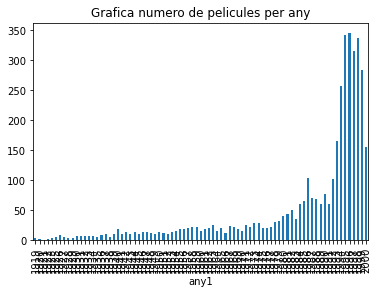

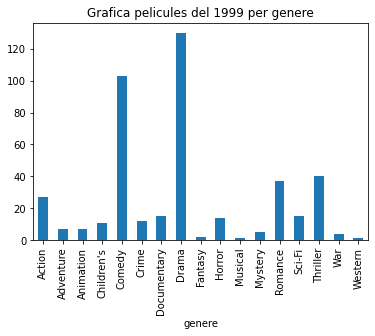

In [19]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


#la serpació en aquest cas són els ::
df = pd.read_csv('movies.dat', sep='::',names=["index","nom","tipus"])
print(df.dtypes)
#canvio el camp tipus,de string a una llista treient el seperador |
df['tipus'] = df.tipus.apply(lambda x: x.split('|'))
print(df.dtypes)

#per cada valor de la llistat de tipus, desplaguem en files
tipus = df['tipus'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
#fem un merge per obtenir la taula original, i cada valor de tipus en una fila

total=pd.merge(
    tipus,
    df[["nom"]],
    left_index=True,
    right_index=True)


#treiem l'any del nom per poder-ho treballar estadísticament
total['any1'] = total.nom.str.extract('(\(\d\d\d\d\))',expand=False)
total['any1'] = total.any1.str.extract('(\d\d\d\d)',expand=False)

#renombro la columna value, per ser un nom de restringit 
total.rename(columns={'value': 'genere'}, inplace=True)

#pivoto la taula perquè cada caracteristica sigui una columna a fi de poder treballar-hi estadísticament
result = total.groupby(['nom', 'any1', 'genere']).size().to_frame('counts').reset_index().pivot_table(total, index = ['nom', 'any1'], columns="genere", aggfunc = 'count').reset_index().fillna(0)


#treiem totals de tipus de pelicules per any
result1 = result.groupby(['any1']).sum()
#-------------------------------------------------------
#- Exercici 3
#Mostreu la vostra creativitat. Què creieu rellevant mostrar del dataset "movies.dat" del exercici anterior? Feu una o dues representacions gràfiques i justifiqueu la seva elecció.
#Hi ha molt poques dades numeriques per analitzar, per tan només podem fer gràfiques de numero de linies duna determinada agrupació

result.groupby('any1').size().plot(kind='bar');
plt.title("Grafica numero de pelicules per any")
plt.show()

# selecionem pelicules del 1999
rslt_df = total[total['any1'].isin(['1999'])]
                 
rslt_df.groupby('genere').size().plot(kind='bar')
plt.title("Grafica pelicules del 1999 per genere")
plt.show()